In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

In [2]:
from importlib import reload

In [3]:
# Read in the training data
train_data = np.genfromtxt('Data/mnist_train.csv', delimiter=',')
# The first row is the headers so we drop it
train_data = train_data[1:]

# Set up image data and labels
x_train = train_data[:,1:]
y_train = train_data[:,0]

In [4]:
# Read in the testing data
test_data = np.genfromtxt('Data/mnist_test.csv', delimiter=',')
# The first row is the headers so we drop it
test_data = test_data[1:]

# Set up image data and labels
x_test = test_data[:,1:]
y_test = test_data[:,0]

In [5]:
# Form the image data into 28x28 arrays since the data is originally 1D array
x_train_square = x_train.reshape((60000, 28, 28))
x_test_square = x_test.reshape((10000, 28, 28))

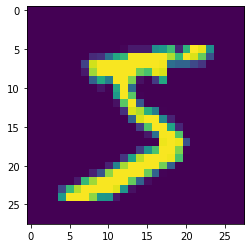

In [6]:
plt.imshow(x_train_square[0])

In [63]:
import MyClassifier_10 as cl
reload(cl)

<module 'MyClassifier_10' from '/Users/sam/GitHub/ECE_236A_Group_10/MyClassifier_10.py'>

In [64]:
classifier = cl.MyClassifier(10, 784)

In [65]:
classifier.train(0, x_train, y_train)

creasing, column 38073 empty
WARN: A->p (column pointers) not strictly increasing, column 38074 empty
WARN: A->p (column pointers) not strictly increasing, column 38075 empty
WARN: A->p (column pointers) not strictly increasing, column 38076 empty
WARN: A->p (column pointers) not strictly increasing, column 38077 empty
WARN: A->p (column pointers) not strictly increasing, column 38078 empty
WARN: A->p (column pointers) not strictly increasing, column 38079 empty
WARN: A->p (column pointers) not strictly increasing, column 38080 empty
WARN: A->p (column pointers) not strictly increasing, column 38105 empty
WARN: A->p (column pointers) not strictly increasing, column 38106 empty
WARN: A->p (column pointers) not strictly increasing, column 38107 empty
WARN: A->p (column pointers) not strictly increasing, column 38108 empty
WARN: A->p (column pointers) not strictly increasing, column 38133 empty
WARN: A->p (column pointers) not strictly increasing, column 38134 empty
WARN: A->p (column poi

SolverError: Solver 'SCS' failed. Try another solver, or solve with verbose=True for more information.

In [126]:
train_classes = classifier.classify(x_train)
test_classes = classifier.classify(x_test)

In [129]:
# Compute the accuracy for the classifications
train_accuracy = sum(abs(train_classes == y_train)) / len(y_train)
test_accuracy = sum(abs(test_classes == y_test)) / len(y_test)

Training and testing accuracy for the basic classifier trained on uncorrupted data set

In [135]:
train_accuracy

0.9859

In [136]:
test_accuracy

0.9169

In [67]:
# A function which applies noise to the training or testing data
def apply_error(images, p):
    corrupt_images = images.copy()
    error = np.random.random(images.shape) >= p
    corrupt_images = images * error
    return corrupt_images

We generate corrupt images for various levels of p

In [68]:
corrupt_images_4 = apply_error(x_test, 0.4)
corrupt_images_6 = apply_error(x_test, 0.6)
corrupt_images_8 = apply_error(x_test, 0.8)

In [140]:
corrupt_classes_4 = classifier.classify(corrupt_images_4)
corrupt_classes_6 = classifier.classify(corrupt_images_6)
corrupt_classes_8 = classifier.classify(corrupt_images_8)

In [141]:
# Compute the accuracy for the classifications
corrupt_accuracy_4 = sum(abs(corrupt_classes_4 == y_test)) / len(y_test)
corrupt_accuracy_6 = sum(abs(corrupt_classes_6 == y_test)) / len(y_test)
corrupt_accuracy_8 = sum(abs(corrupt_classes_8 == y_test)) / len(y_test)

In [142]:
corrupt_accuracy_4

0.5286

In [143]:
corrupt_accuracy_6

0.3902

In [144]:
corrupt_accuracy_8

0.2561

Now we consider training with the corrupted data

In [69]:
corrupt_classifier = cl.MyClassifier(10, 784)
corrupt_classifier.train(0.4, x_train, y_train)

nters) not strictly increasing, column 36240 empty
WARN: A->p (column pointers) not strictly increasing, column 36241 empty
WARN: A->p (column pointers) not strictly increasing, column 36242 empty
WARN: A->p (column pointers) not strictly increasing, column 36243 empty
WARN: A->p (column pointers) not strictly increasing, column 36244 empty
WARN: A->p (column pointers) not strictly increasing, column 36245 empty
WARN: A->p (column pointers) not strictly increasing, column 36246 empty
WARN: A->p (column pointers) not strictly increasing, column 36247 empty
WARN: A->p (column pointers) not strictly increasing, column 36248 empty
WARN: A->p (column pointers) not strictly increasing, column 36271 empty
WARN: A->p (column pointers) not strictly increasing, column 36272 empty
WARN: A->p (column pointers) not strictly increasing, column 36273 empty
WARN: A->p (column pointers) not strictly increasing, column 36274 empty
WARN: A->p (column pointers) not strictly increasing, column 36275 empty


SolverError: Solver 'SCS' failed. Try another solver, or solve with verbose=True for more information.

In [147]:
train_classes = corrupt_classifier.classify(x_train)
test_classes = corrupt_classifier.classify(x_test)

In [148]:
# Compute the accuracy for the classifications
train_accuracy = sum(abs(train_classes == y_train)) / len(y_train)
test_accuracy = sum(abs(test_classes == y_test)) / len(y_test)

In [149]:
train_accuracy

0.9033

In [ ]:
test_ac

In [ ]:
corrupt_classes_4 = corrupt_classifier.classify(corrupt_images_4)
corrupt_classes_6 = corrupt_classifier.classify(corrupt_images_6)
corrupt_classes_8 = corrupt_classifier.classify(corrupt_images_8)

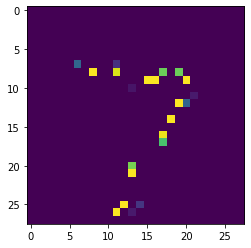

In [71]:
plt.figure()
plt.imshow(corrupt_images[0])

In [46]:
x_test_masked

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [64]:
corrupt_x_test_masked = cl.apply_error(x_test_masked, 0.6, 10)


In [65]:
corrupt_x_test_masked.shape

(21150, 28, 28)

In [69]:
np.tile(y_train, (10,)).shape

(600000,)

In [49]:
corrupt_x_test_masked = apply_error(x_test_masked, 0.6)
corrupt_test_classes = classifier.classify(corrupt_x_test_masked)
corrupt_test_accuracy = sum(abs(corrupt_test_classes == y_test_masked)) / len(y_test_masked)

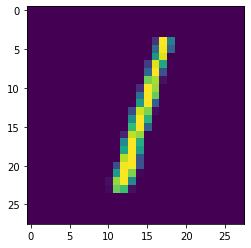

In [50]:
plt.imshow(x_test_masked[0])

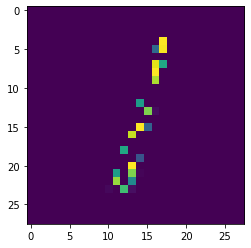

In [51]:
plt.imshow(corrupt_x_test_masked[0])

In [53]:
corrupt_test_accuracy

0.7867612293144208